# Изучение рынка компьютерных игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Этап 1. Изучение и обзор данных

### Описание данных

* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

### Загрузка и осмотр датасета

In [2]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

from datetime import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [5]:
# Прочитаем файл games.csv из папки и сохраним его в переменной df
df = pd.read_csv(r"C:\Users\games.csv")

In [6]:
# Заранее настроим отображение всех столбцов
pd.set_option('display.max_columns', None)

In [7]:
# Выведем пять рандомных строчек датафрейма
df.sample(n=5, random_state=None)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4440,Taiko no Tatsujin: Doki! Shinkyoku Darake no H...,PS2,2003.0,Misc,0.00,0.00,0.44,0.00,NaN,NaN,NaN
15222,RedCard 20-03,GC,2002.0,Sports,0.02,0.00,0.00,0.00,71.0,7.4,E
12013,We Sing Rock!,Wii,2011.0,Misc,0.00,0.06,0.00,0.01,NaN,NaN,NaN
2843,Jampack Winter 2001,PS2,2001.0,Misc,0.35,0.28,0.00,0.09,NaN,tbd,NaN
15460,Meitantei Conan: Kieta Hakase to Machigai Saga...,DS,2008.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [8]:
# Выведем основную информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
# Посмотрим описательные статистики датасета
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
df.sample(n=5, random_state=None)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10876,Forever Kingdom,PS2,2001.0,Role-Playing,0.02,0.02,0.04,0.01,64.0,7.8,T
7779,The Rise of the Argonauts,PS3,2008.0,Role-Playing,0.05,0.11,0.00,0.03,NaN,NaN,NaN
10864,PhotoKano,PSP,2012.0,Adventure,0.00,0.00,0.09,0.00,NaN,NaN,NaN
4811,Hot Wheels: Beat That!,PS2,2007.0,Racing,0.20,0.15,0.00,0.05,NaN,tbd,E
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


In [8]:
# Выведим в список уникальные значения столбца с рейтингом от организации ESRB 'Rating'
df['Rating'].unique().tolist()

['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

In [9]:
# Выведим в список уникальные значения столбца с жанром игры 'Genre'
df['Genre'].unique().tolist()

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy',
 nan]

In [10]:
# Выведим в список уникальные значения столбца с названием платформы 'Platform'
df['Platform'].unique().tolist()

['Wii',
 'NES',
 'GB',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'SNES',
 'GBA',
 'PS4',
 '3DS',
 'N64',
 'PS',
 'XB',
 'PC',
 '2600',
 'PSP',
 'XOne',
 'WiiU',
 'GC',
 'GEN',
 'DC',
 'PSV',
 'SAT',
 'SCD',
 'WS',
 'NG',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

### Вывод

Далее:

* изменим регистр заголовков в наименовании столбцов;
* изменим тип данных в колонке с оценкой пользователей 'User_Score';
* обработаем пропуски в колонках Year_of_Release, Critic_Score, User_Score, Rating, Genre.

## Этап 2. Предобработка данных

### Замена наименования столбцов

In [11]:
# Переведем названия колонок в нижний регистр
# df.columns = df.columns.str.lower()
df.columns = map(str.lower, df.columns)

In [12]:
# Проверим изменения в наименовании столбцов
# Выведем пять рандомных строчек датафрейма
df.sample(n=5, random_state=None)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6866,Ratchet & Clank: Going Commando (JP weekly sales),PS2,2003.0,Action,0.00,0.00,0.24,0.00,NaN,NaN,NaN
10055,Vacation Isle: Beach Party,Wii,2010.0,Misc,0.08,0.02,0.00,0.01,NaN,tbd,E
9582,Star Wars: Clone Wars,XB,2003.0,Shooter,0.10,0.03,0.00,0.00,NaN,NaN,NaN
8847,Fantastic Four: Rise of the Silver Surfer,PS3,2007.0,Action,0.12,0.02,0.00,0.02,47.0,6.2,T
11640,Ultimate Fighting Championship: Throwdown,GC,2002.0,Fighting,0.06,0.02,0.00,0.00,67.0,tbd,T


### Приведение данных к нужным типам

In [13]:
# Выведем уникальные значения в столбце с оценкой пользователей 'user_score'
# df['user_score'].unique().tolist()

In [14]:
# Выведем строки с 'tbd'
df.query("user_score == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Порядка 15% строк с такой аббревиатурой. Переводится, как "подлежит уточнению". \
Явных закономерностей не прослеживается, использовать число (заменить tbd на 0) мы не можем, иначе замененные 'tbd' могут повлиять на оценку рейтингов. Поэтому присвоим значение NaN.

In [17]:
# Заменим значения в колонке с оценкой пользователей 'user_score' c 'tbd' на NaN
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [18]:
# Преобразуем данные с оценкой пользователей из значений типа integer (целые числа) во float (числа с плавающей точкой)
df['user_score'] = df['user_score'].astype('float64')

In [19]:
# Преобразуем данные с годом выпуска  из значений типа float (числа с плавающей точкой) в integer (целые числа)
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [20]:
# Проверим преобразованные данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков в данных

In [21]:
# Посмотрим на количество пропусков в данных по столбцам
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Посмотрим поближе на строки с пропусками.

In [22]:
# Рассмотрим пропуски в названии игр
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 строки с отсутствием данных в большинстве колонок.\
Возможно в 1993 году еще не составляли рейтинги на постоянной основе и не вссе игры их имели.\
Удалим эти строки.

In [23]:
# Удалим строки с пропусками в названии игр
df.dropna(subset=['name'], inplace=True)

In [24]:
# Рассмотрим пропуски в дате выхода игр
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Кажется, что можно частично заменить пропуски на год, указанный в названии игры.\
Но как показывает практика, года в названиях и по факту выпуска могут не соответствовать, так как часть игр выходит заранее (спортивные игры в частности).\
Поэтому мы не можем ни чем заменить пропуски.

In [25]:
# Рассмотрим пропуски в жанре игр
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [26]:
# Рассмотрим пропуски в оценке критиков
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [27]:
# Рассмотрим пропуски в оценке пользователей
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [28]:
# Рассмотрим пропуски в рейтинге от организации ESRB
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как видим, пропуски в оценках и рейтингах не зависят от платформы, есть и старые в современных играх. Даже одна и та же игра на разных платформах может иметь разные рейтинги. Так как не видно эффективного способа заполнения пропусков, чтобы не исказить данные, оставим все как есть, и будем использовать для анализа то, что имеем.

In [29]:
# Проверим дубликаты
df.duplicated().sum()

0

Среди причин появления таких пропусков могут быть ошибки выгрузки данных, человеческих фактор или что-то еще.

### Расчёты и добавление результатов в таблицу

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [30]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [31]:
# Создадим новый столбец с общим количеством продаж (миллионы проданных копий)
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [32]:
# Упорядочим колонки в удобном порядке
neworder = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 
               'critic_score', 'user_score', 'rating']
df = df.reindex(columns=neworder)

In [33]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


Данные скорректированы, добавлен новый столбец с общими продажами.\
Приступим к исследовательскому анализу данных.

## Этап 3. Исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Анализ продаж по платформам
* Определение актуального периода
* Поиск потенциально прибыльных платформ
* Глобальные продажи игр по платформам
* Оценка влияния отзывов пользователей и критиков
* Соотнесите выводы с продажами игр на других платформах
* Анализ распределение игр по жанрам

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [34]:
# Создадим таблицу учёта количества игр разных лет выпуска
year_of_release = df.groupby('year_of_release')['name'].count().reset_index()
year_of_release.columns = ['year', 'sum']
year_of_release

,year,sum
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


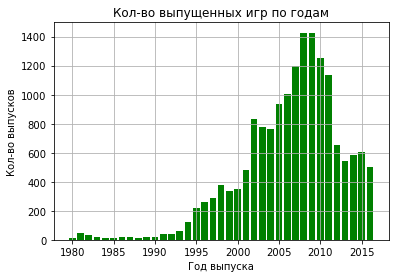

In [35]:
plt.bar(year_of_release['year'], year_of_release['sum'], label='Кол-во выпусков в год', color='g')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во выпусков')
plt.grid(True)
plt.title(f'Кол-во выпущенных игр по годам')
plt.show()

История игр на одном графике. Простейшие игры до середины 90-х. Техника/технологии, вероятно, еще не позволяли развиваться рынку игр. Затем в 94-95 годах наблюдается резкий скачок, компьютеры и приставки входят в жизнь обычных граждан и рынок игр стремительно набирает обороты. В 2002 количество игр снова увеличивается, практически вдвое и продолжает рост вплоть до 2011 года. В 2012 мы видим падение в половину предыдущего года и далее уже никакого роста не наблюдается. Вероятно это можно объяснить популярностью мобильных игр, люди "ушли" в телефоны. Нет спроса на компютерные игры, значит и не имеет смысла выпускать новые. Куда логичнее инвестировать в мобильные игры. Вероятно, производители игр так и поступили. Данные до 1995 года не обладают актуальностью.

### Анализ продаж по платформам

Посмотрим, как менялись продажи по платформам. \
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. \
Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

In [36]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


In [37]:
df.groupby('platform')['total_sales'].sum().sort_values().reset_index()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [38]:
# Создадим топ-10 платформ по продажам
platform_df = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
platform_df

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [39]:
# Создадим переменную, хранящую список топ-10 платформ по продажам
top_platform = platform_df['platform'].tolist()
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [40]:
# Создадим новый датасет, отфильтровав старый по названиям платформ, хранящимся в переменной
df_new_top = df.query("platform in @top_platform").reset_index()
df_new_top.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E


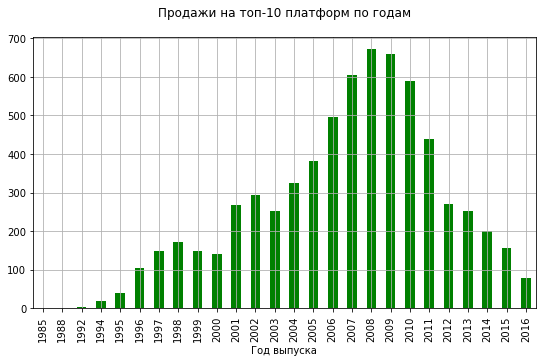

In [41]:
df_new_top.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', kind='bar', color='g', figsize=(9,5))
plt.title('Продажи на топ-10 платформ по годам', pad=20)
plt.xlabel('Год выпуска')
plt.grid(True)
plt.show();

Топ-10 платформ по продажам практически не включает данные до 1995, что подтверждает неактуальность этого периода.

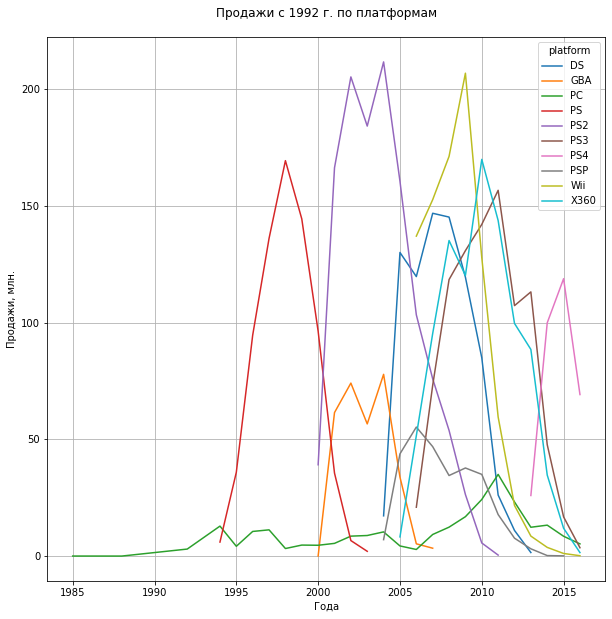

In [43]:
# Теперь построим распределение по годам для каждой из топ-10 платформ
pd.pivot_table(df_new_top, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,10))
plt.grid(True)
plt.title('Продажи с 1992 г. по платформам', pad=20)
plt.xlabel('Года')
plt.ylabel('Продажи, млн.')
plt.show()

Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

In [44]:
df_new_top.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E


In [52]:
# Сколько лет "живет" топ-10 платформ
df_new_top_years = df_new_top.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
df_new_top_years['platform'].value_counts()

PC      26
X360    12
PSP     12
PS2     12
PS3     11
Wii     11
DS      11
PS      10
GBA      8
PS4      4
Name: platform, dtype: int64

In [47]:
df_new_top_years['platform'].value_counts().mean()

11.7

**Вывод:** продолжительность жизни платформы в среднем 12 лет.

### Определение актуального периода

Для дальнейших исследований возьмём данные только за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Как мы выяснили ранее, средний срок жизни платформ примерно 12 лет, поэтому для прогноза на 2017 год возьмем предыдущий период в 12 лет (с 2005 года).

In [53]:
# Сводная таблица количества игр для каждой платформы по годам в актуальный период
df[df['year_of_release'] > 2004].pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,
3DS,-,-,-,-,-,-,116.0,93.0,91.0,80.0,86.0,46.0
DC,-,-,1.0,1.0,-,-,-,-,-,-,-,-
DS,118.0,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,-,-,-
GBA,135.0,39.0,6.0,-,-,-,-,-,-,-,-,-
GC,97.0,40.0,4.0,-,-,-,-,-,-,-,-,-
PC,37.0,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS2,260.0,259.0,214.0,191.0,96.0,38.0,7.0,-,-,-,-,-
PS3,-,27.0,90.0,138.0,162.0,181.0,215.0,148.0,126.0,108.0,73.0,38.0
PS4,-,-,-,-,-,-,-,-,16.0,75.0,137.0,164.0


По распределению можно заметить, что примерно в 2005 году рынок платформ меняется и на замену старым приходят новые.\
Поэтому можно сократить актуальный период до 6 лет (2011 - 2016).\
Да мы потеряем данные по платформам, которые были на всем периоде 12 лет, но рынок игр так стремительно меняется, что корректнее брать в расчёт более поздний период, в котором будут пробладать новые платформы.

### Поиск потенциально прибыльных платформ

Выясним, какие платформы лидируют по продажам, растут или падают.\
Выберем несколько потенциально прибыльных платформ.

In [54]:
df_actual_years = df[df['year_of_release'] >= 2011]
df_actual_years.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,116.0,93.0,91.0,80.0,86.0,46.0
DS,153.0,23.0,8.0,-,-,-
PC,139.0,61.0,38.0,47.0,50.0,54.0
PS2,7.0,-,-,-,-,-
PS3,215.0,148.0,126.0,108.0,73.0,38.0
PS4,-,-,16.0,75.0,137.0,164.0
PSP,139.0,106.0,54.0,10.0,3.0,-
PSV,18.0,53.0,63.0,100.0,110.0,85.0
Wii,143.0,31.0,12.0,6.0,4.0,1.0


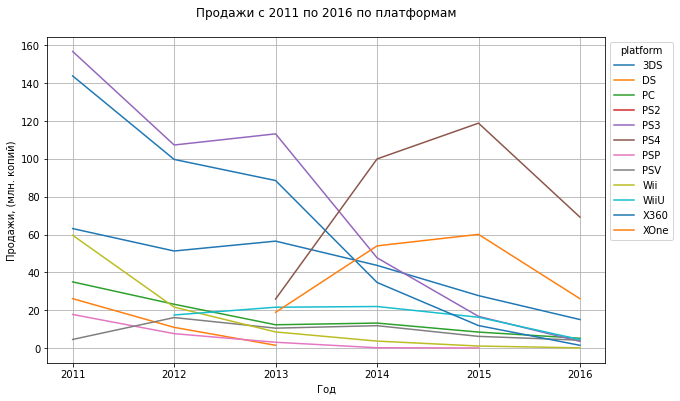

In [55]:
# Построим графики динамики продаж топ-10 платформ за актуальный период
pd.pivot_table(df_actual_years, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,6))
plt.grid(True)
plt.title('Продажи с 2011 по 2016 по платформам', pad=20)
plt.xlabel('Год')
plt.ylabel('Продажи, (млн. копий)')
plt.legend(loc='best', bbox_to_anchor=(1,1), title='platform')
plt.show()

Как мы видим на графике многие платформы теряют в продажах.\
По условиям, данные по 2016 году могут быть неполными, а значит ориентироваться на него не стоит.\
Шанс улучшить показатели продаж есть у PS4, PC, PSV, XOne и WiiU.\
Наилучшие перспективы у платформ PC, PS4 и XOne.

In [56]:
# Список топ-5 перспективных платформ
top5_platform_name = ['PC', 'PS4', 'XOne', 'PSV', 'WiiU']
top5_platform_name

['PC', 'PS4', 'XOne', 'PSV', 'WiiU']

In [57]:
# Продажи топ-5 перспективных платформ
top5_platform = df_actual_years.query("platform in @top5_platform_name").groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top5_platform

,platform,total_sales
0,PS4,314.14
1,XOne,159.32
2,PC,97.68
3,WiiU,82.19
4,PSV,53.81


### Глобальные продажи игр по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.\
Опишем результат.

In [58]:
df_actual_years['total_sales'].describe()

count    4022.000000
mean        0.485855
std         1.219503
min         0.010000
25%         0.040000
50%         0.130000
75%         0.407500
max        21.050000
Name: total_sales, dtype: float64

(0.0, 1.25)

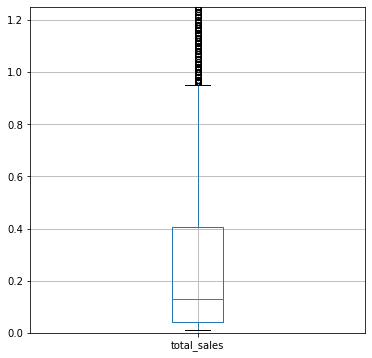

In [59]:
# «Ящик с усами» по глобальным продажам за актуальный период по всем платформам
df_actual_years.boxplot('total_sales', figsize=(6,6))
plt.ylim(0, 1.25)

In [60]:
df_actual_5 = df_actual_years.query('platform in @top5_platform_name')
df_actual_5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,7.66,83.0,5.7,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,0.01,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN


In [61]:
top5_platform

,platform,total_sales
0,PS4,314.14
1,XOne,159.32
2,PC,97.68
3,WiiU,82.19
4,PSV,53.81


Text(0.5, 0, 'Название платформы')

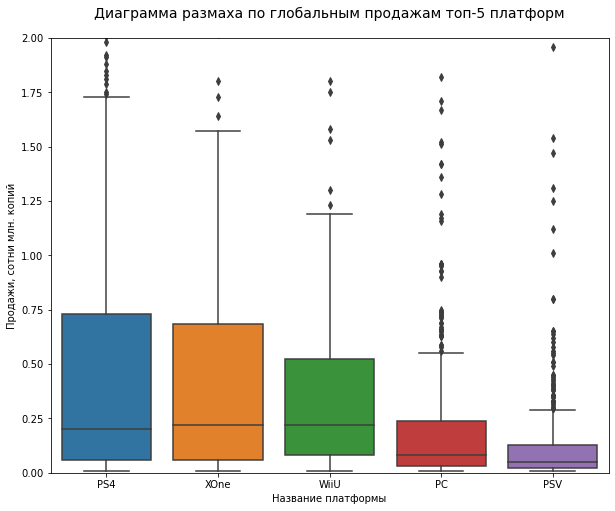

In [67]:
# «Ящик с усами» по глобальным продажам за актуальный период по каждой перспективной платформе
plt.figure(figsize=(10, 8))
plt.ylim(0, 2)
sns.boxplot(data=df_actual_5, x='platform', y='total_sales') 
plt.title('Диаграмма размаха по глобальным продажам топ-5 платформ', fontsize=14, pad=20)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название платформы')

In [68]:
# Глобальные продажи по актуальным платформам
df_actual_years_5 = df_actual_5.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value='.')
df_actual_years_5['all_years'] = df_actual_years_5.sum(axis=1)
df_actual_years_5.sort_values(by='all_years', ascending=False)

year_of_release,2011,2012,2013,2014,2015,2016,all_years
platform,,,,,,,
PS4,.,.,25.99,100.00,118.90,69.25,314.14
XOne,.,.,18.96,54.07,60.14,26.15,159.32
WiiU,.,17.56,21.65,22.03,16.35,4.60,64.63
PC,35.03,23.22,12.38,13.28,8.52,5.25,39.43
PSV,4.63,16.19,10.59,11.90,6.25,4.25,32.99


За последние 6 лет наибольший объем продаж у платформ: PS4, XOne и WiiU. Общий объем продаж у платформ PC и PSV был за счёт более ранних продаж, тогда как сейчас наблюдается стабильное падение. Высокие медианные значения у PS4, XOne и WiiU, хотя WiiU сильно меньше в объемах продаж.\
Так как продажи указаны в млн. копий, а не в денежном выражении, то есть вероятность, что платформа WiiU тоже может быть перспективной.

### Оценка влияния отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.\
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.\
Сформулирем выводы.

Самая продаваемая платформа у нас PS4, посмотрим взаимосвязи на ней.

In [69]:
# Отфильтруем данные по платформе PS4 и подготовим таблицу
filtered_ps4 = df_actual_5.query("platform == 'PS4'")
filtered_ps4 = filtered_ps4[['critic_score', 'user_score', 'total_sales']]
filtered_ps4.head()

,critic_score,user_score,total_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


Text(0.5, 1.0, 'Зависимость продаж от оценки критиков')

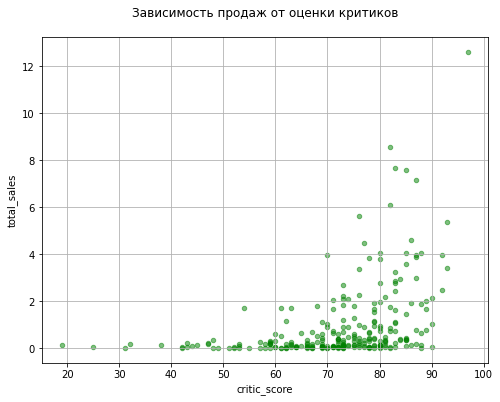

In [70]:
# Диаграмма рассеяния 1
filtered_ps4.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8,6), color='g', alpha=0.5, grid=True)
plt.title('Зависимость продаж от оценки критиков', pad=20)

Text(0.5, 1.0, 'Зависимость продаж от оценки пользователей')

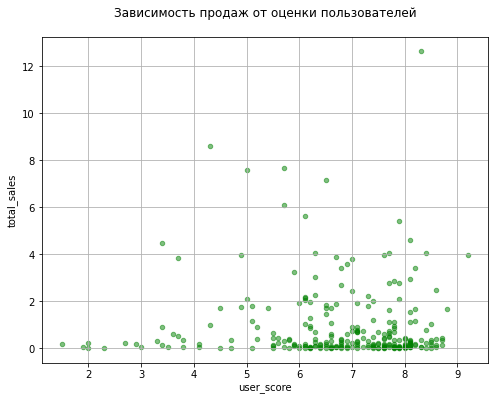

In [71]:
# Диаграмма рассеяния 2
filtered_ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8,6), color='g', alpha=0.5, grid=True)
plt.title('Зависимость продаж от оценки пользователей', pad=20)

Глядя на графики, можно сказать, что оценки критиков и пользователей не оказывают слишком сильного влияние на продажи игр.\
Посмотрим кореляцию.

In [72]:
# Рассчитаем корреляцию
filtered_ps4.corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.56,0.41
user_score,0.56,1.00,-0.03
total_sales,0.41,-0.03,1.00


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='total_sales', ylabel='total_sales'>]],
      dtype=object)

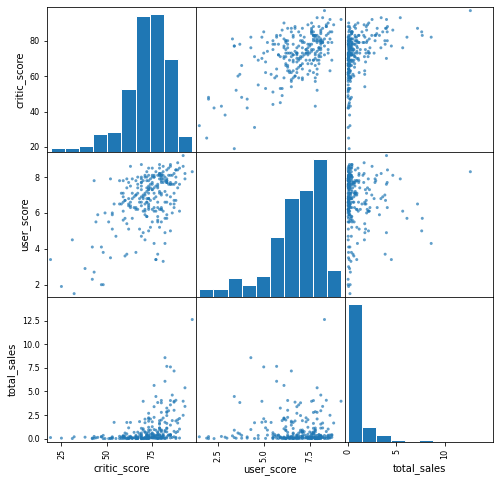

In [73]:
pd.plotting.scatter_matrix(filtered_ps4,  
                           density_kwds=({'edgecolor':'w'}), hist_kwds=({'edgecolor':'w'}), 
                           alpha=.7, figsize=(8,8))

Есть положительная средняя корреляция между оценкой критиков и пользователей.\
Критики могут учитывать мнение пользоватлей в своих оценках и наоборот.

### Соотнесите выводы с продажами игр на других платформах

Рассчитаем корреляцию для других платформ.

In [74]:
filtered_xone = df_actual_years.query("platform == 'XOne'")
filtered_xone = filtered_xone[['critic_score', 'user_score', 'total_sales']]
filtered_xone.corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.47,0.42
user_score,0.47,1.00,-0.07
total_sales,0.42,-0.07,1.00


In [75]:
filtered_wiiu = df_actual_years.query("platform == 'WiiU'")
filtered_wiiu = filtered_wiiu[['critic_score', 'user_score', 'total_sales']]
filtered_wiiu.corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.77,0.35
user_score,0.77,1.00,0.40
total_sales,0.35,0.40,1.00


In [76]:
filtered_pc = df_actual_years.query("platform == 'PC'")
filtered_pc = filtered_pc[['critic_score', 'user_score', 'total_sales']]
filtered_pc.corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.46,0.31
user_score,0.46,1.00,-0.05
total_sales,0.31,-0.05,1.00


In [77]:
filtered_psv = df_actual_years.query("platform == 'PSV'")
filtered_psv = filtered_psv[['critic_score', 'user_score', 'total_sales']]
filtered_psv.corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.73,0.13
user_score,0.73,1.00,0.01
total_sales,0.13,0.01,1.00


In [78]:
df_actual_5[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.50,0.32
user_score,0.50,1.00,0.01
total_sales,0.32,0.01,1.00


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='total_sales', ylabel='total_sales'>]],
      dtype=object)

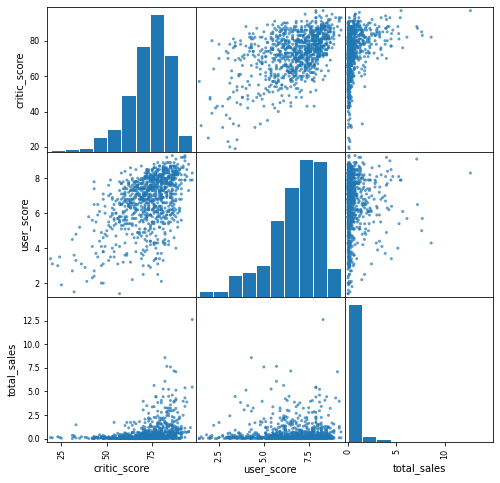

In [79]:
pd.plotting.scatter_matrix(df_actual_5[['critic_score', 'user_score', 'total_sales']],  
                           density_kwds=({'edgecolor':'w'}), hist_kwds=({'edgecolor':'w'}), 
                           alpha=.7, figsize=(8,8))

Для остальных платформ мы видим более выраженную корреляцию между оценками (> 0.7), а значит существует положительная связь — чем выше оценки критиков, тем выше оценки пользователей и наоборот. Связь между оценками и количеством проданных копий положительная, но очень слабая (не более 0.42), мы не можем брать её в расчёт.

При оценки общей корреляции, можно говорить о невысокой положительной связи (0.5) оценки критиков и оценки пользователей.

### Анализ распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.\
Выясним, что можно сказать о самых прибыльных жанрах.\
Посмотрим, выделяются ли жанры с высокими и низкими продажами.

In [80]:
# Общее распределение игр по жанрам
df_actual_5['genre'].value_counts()

Action          530
Role-Playing    197
Adventure       167
Shooter         156
Sports          139
Misc             92
Racing           82
Strategy         65
Simulation       58
Fighting         49
Platform         49
Puzzle           20
Name: genre, dtype: int64

In [81]:
# # Самые прибыльные жанры
df_genre = df_actual_5.groupby('genre').agg({'total_sales':'sum', 'name':'count'}).\
                                            rename(columns={'name':'name_count'}).\
                                            sort_values(by='total_sales', ascending=False)
df_genre.head()

,total_sales,name_count
genre,,
Action,189.04,530
Shooter,181.70,156
Sports,95.31,139
Role-Playing,77.26,197
Racing,34.47,82


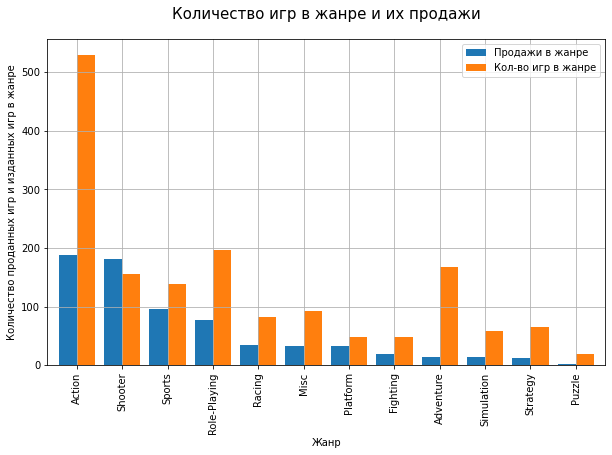

In [82]:
ax = df_genre[['total_sales', 'name_count']].sort_values(by='total_sales', ascending=False).\
    plot(kind='bar', figsize=(10,6), width=.8)

plt.title('Количество игр в жанре и их продажи', fontsize=15, pad=20)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр и изданных игр в жанре')
plt.legend(['Продажи в жанре', 'Кол-во игр в жанре'])
plt.grid(True)
plt.show()

Мы можем сказать, что самыми продаваемыми жанрами являются:

* Action
* Shooter
* Sports
* Role-Playing
* Racing

Но мы не можем сказать, какой из жанров прибыльнее, так как не знаем затраты на создание игры. В жанре Action самое большое кол-во игр, возможно их создание обходится недорого, а объемы продаж позволяют производителям получать хорошую прибыль. Также довольно большое кличество игр наблюдается в жанре Role-Playing, но он не сопровождается высоким уровнем продаж.\
А вот в жанре Shooter игр не так много, хотя жанр на 2 месте по объемам продаж, возможно создание игр обходится существенно дороже и прибыль становится не такой ощутимой.

Самые низкие продажи и минимальное количество игр у жанров Strategy и Puzzle.

### Вывод

Вывод
Нам удалось выяснить, что:

* актуальный период, данные которого помогут построить прогноз на 2017 - это 2011 - 2016 годы;
* самые перспективные платформы: PS4, XOne и WiiU;
* оценки критиков и пользователей не имеют выраженного влияния на объемы продаж, но оценки влияют друг на друга;
* самые продаваемые жанры: Action, Shooter, именно в этих жанрах подавляющее большинство игр. Игры в жанре Shooter на втором месте по продажам, но его представляет куда меньшее количество игр. В зависимости от цены создания игры в этом жанре, он может быть перспективной прибыльной и свободной нишей или же оказаться неприбыльным и оттого в нём мало конкурентов.

## Этап 4. Составление портрета пользователя каждого региона

Далее определим:

* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Влияние рейтинга ESRB на продажи

In [83]:
df_actual_5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,7.66,83.0,5.7,M


In [84]:
df_actual_5[['na_sales', 'eu_sales', 'jp_sales']].describe()

,na_sales,eu_sales,jp_sales
count,1604.000000,1604.000000,1604.000000
mean,0.176004,0.179289,0.031889
std,0.442113,0.471067,0.091977
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.030000,0.040000,0.000000
75%,0.140000,0.140000,0.030000
max,6.030000,6.310000,1.460000


### Самые популярные платформы (топ-5)

In [85]:
# # Самые популярные платформы (топ-5) в Северной Америке
# df_na_platform = df_actual_5.groupby(['platform']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
# print(  )
# print('-- Топ-5 платформ Северной Америки --')
# display(df_na_platform)

# # Самые популярные платформы в Европе
# df_eu_platform = df_actual_5.groupby(['platform']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
# print(  )
# print('-- Топ-5 платформ Европы --')
# display(df_eu_platform)

# # Самые популярные платформы в Японии
# df_jp_platform = df_actual_5.groupby(['platform']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
# print(  )
# print('-- Топ-5 платформ Японии --')
# display(df_jp_platform)

In [86]:
# fig, ax = plt.subplots(figsize=(12,5))

# #Задаём переменные 
# x = list(df_actual_5['platform'])
# y1 = df_actual_5['na_sales']
# y2 = df_actual_5['eu_sales']
# y3 = df_actual_5['jp_sales']

# #Строим графики
# ax.bar(x, y1, 0.3, label='na_sales')
# ax.bar(x, y2, 0.3, label='eu_sales')
# ax.bar(x, y3, 0.3, label='jp_sales')

# #Оформляем  
# ax.set_title('Популярность платформ в регионах', pad=20)
# ax.set_ylabel('Продажи')
# ax.grid()
# ax.legend(fontsize=15)

# plt.show()

In [87]:
df_platform = df_actual_5.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'total_sales':'sum'}).\
                                                sort_values(by='total_sales', ascending=False)
df_platform

,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
PS4,108.74,141.09,15.96,314.14
XOne,93.12,51.59,0.34,159.32
PC,29.88,56.70,0.00,97.68
WiiU,38.10,25.13,13.01,82.19
PSV,12.47,13.07,21.84,53.81


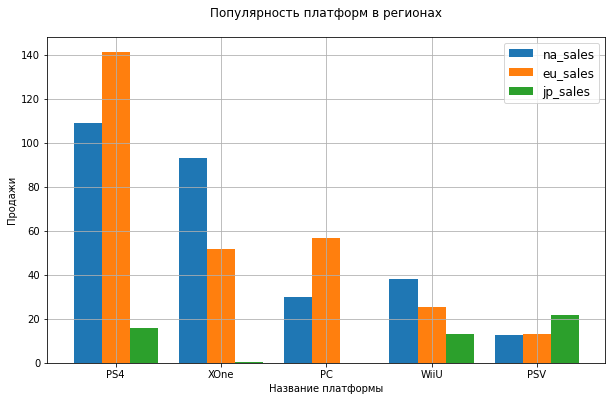

In [88]:
ax = df_platform[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(10,6), width=.8, rot=0)

# Оформим графики
plt.title('Популярность платформ в регионах', pad=20)
plt.xlabel('Название платформы')
plt.ylabel('Продажи')
plt.legend(loc='best', fontsize=12)
plt.grid(True)

plt.show()

График получился не очень репрезентативным, попробуем сделать диаграмму пирог.

In [89]:
top5_platform_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_platform_dict[region] = df_actual_5.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    
top5_platform_dict

{'na_sales': platform
 PS4     108.74
 XOne     93.12
 WiiU     38.10
 PC       29.88
 PSV      12.47
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     141.09
 PC       56.70
 XOne     51.59
 WiiU     25.13
 PSV      13.07
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 PSV     21.84
 PS4     15.96
 WiiU    13.01
 XOne     0.34
 PC       0.00
 Name: jp_sales, dtype: float64}

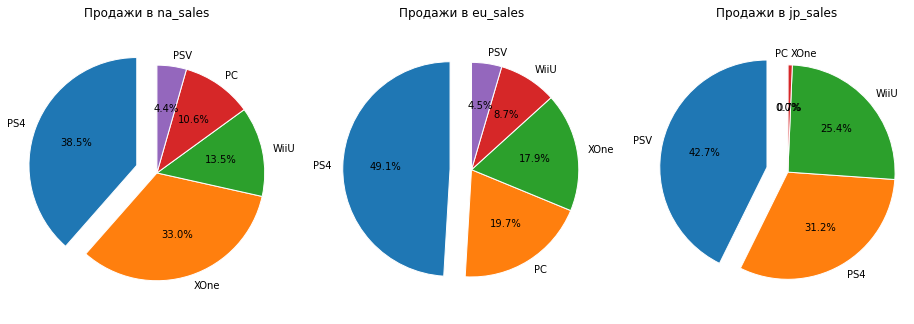

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
fig.autofmt_xdate()

# Задаем переменные
i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.2, 0, 0, 0, 0)

# Цикл для вывода диаграмм распределения жанров
for i in [0,1,2]:
    labels = top5_platform_dict[region[i]].index
    sizes = top5_platform_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, explode=explode, startangle=90, 
           wedgeprops={'linewidth':1,'edgecolor':'white'})
    ax.axis('equal')  
plt.show()

**Выводы:**

* Топ-5 платформ в США и Европе схож. 1 место у платформы PS4, причем если в США доля от всех продаж 38,5%, то в Европе практически половина продаж приходится на эту платформу (49.1%). Платформа XOne в зависимости от региона занимает 2 и 3 место, PC — 4 и 2, WiiU — 3 и 4 место, соотвественно. А у платформы PSV примерно одинаковые доли для каждого рынка.

 
* Топ-5 платформ в Японии заметно отличается. Тут 1 место (42,7%) продаж принадлежит платформе PSV. Платформы PS4 и WiiU составляют 31.2% и 25.4% соответственно. При выходе на Японский рынок стоит учитывать его особенности.

### Самые популярные жанры (топ-5)

In [92]:
df_genre = df_actual_5.groupby('genre').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'total_sales':'sum'}).\
                                                sort_values(by='total_sales', ascending=False).head(5)
df_genre

,na_sales,eu_sales,jp_sales,total_sales
genre,,,,
Action,73.79,77.55,13.88,189.04
Shooter,81.20,72.59,4.75,181.70
Sports,38.38,41.49,2.58,95.31
Role-Playing,28.24,28.00,12.23,77.26
Racing,11.45,17.35,1.77,34.47


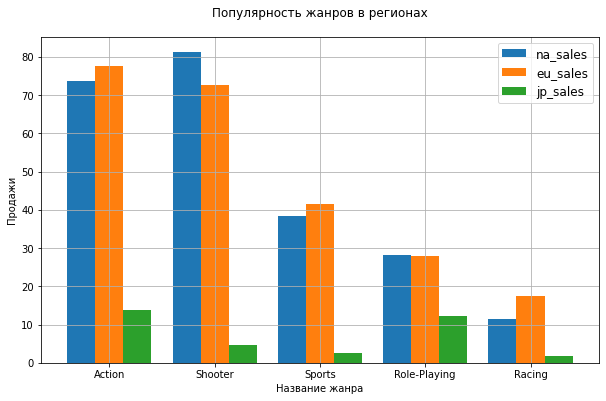

In [93]:
ax = df_genre[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', figsize=(10,6), width=.8, rot=0)

# Оформим графики
plt.title('Популярность жанров в регионах', pad=20)
plt.xlabel('Название жанра')
plt.ylabel('Продажи')
plt.legend(loc='best', fontsize=12)
plt.grid(True)

plt.show()

График получился не очень репрезентативным, попробуем сделать диаграмму пирог.

In [94]:
top5_genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_genre_dict[region] = df_actual_5.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    
top5_genre_dict

{'na_sales': genre
 Shooter         81.20
 Action          73.79
 Sports          38.38
 Role-Playing    28.24
 Misc            14.49
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          77.55
 Shooter         72.59
 Sports          41.49
 Role-Playing    28.00
 Racing          17.35
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Action          13.88
 Role-Playing    12.23
 Misc             5.19
 Shooter          4.75
 Platform         4.23
 Name: jp_sales, dtype: float64}

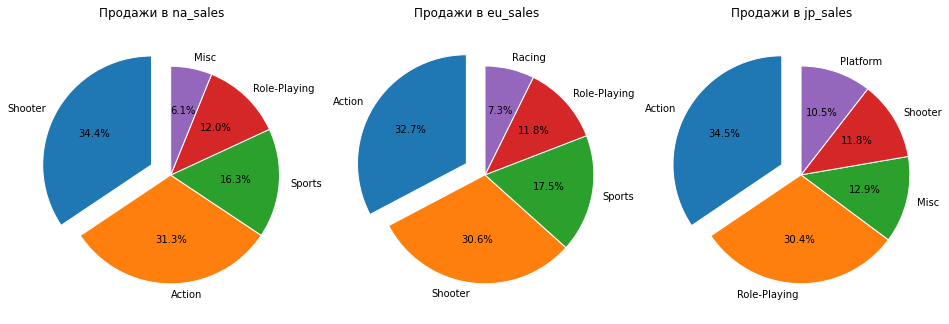

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,6))
fig.autofmt_xdate()

i=0
x= [ax1, ax2, ax3]
region=['na_sales', 'eu_sales', 'jp_sales']
explode=[0.2, 0, 0, 0, 0]

for i in [0,1,2]:
    labels = top5_genre_dict[region[i]].index
    sizes = top5_genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, explode=explode, startangle=90, 
           wedgeprops={'linewidth':1,'edgecolor':'white'})
    ax.axis('equal')
plt.show()

**Выводы:**

* Топ-5 жанров в США и Европе словпадает первое мето (32-34% всех продаж) и второе место (30-31% всех продаж) у жанров Action и Shooter соответственно. Sports с примерно равным соотношением долей продаж (16-17%) занимает третье место. На четвертом месте — Role-Playing. На пятом месте жанр Misc и Racing — 6,1% и 7,3% соотвественно.


* Топ-5 жанров в Японии заметно отличается. Первое место и 34,5% продаж принадлежат жанру Action. Жанр Role-Playing занимает второе место и 30% продаж. Жанры Misc, Shooter и Platform по 10-12% от всех продаж. При выходе на Японский рынок стоит учитывать его особенности.

### Влияние рейтинга ESRB на продажи

In [96]:
df_rating = (df_actual_years.
            pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum')).\
            sort_values(by='total_sales', ascending=False)
df_rating

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
M,250.26,26.14,308.45,666.81
E,141.73,36.68,170.17,389.44
T,83.16,33.39,109.31,254.03
E10+,78.00,11.23,117.72,230.86
EC,0.00,0.00,0.42,0.45
RP,0.03,0.00,0.00,0.04


В условиях задания не было полной расшифровки аббревиатур. В интернете удалось найти расшифровку значений рейтинга ESRB:

* AO (Adults only 18+) — только для взрослых
* E - everyone - для всех
* M (Mature 17+) — от 17 лет
* T (Teen) — для подростков 13-19 лет
* K-A (Kids to Adults)— для детей и взрослых
* E10+ (Everyone 10+) — для всех старше 10 лет
* EC (Early Childhood) — для детей младшего возраста
* RP (Rating pending) — рейтинг ожидается

In [97]:
df_actual_years.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)

,rating,na_sales
3,M,308.45
0,E,170.17
1,E10+,117.72
5,T,109.31
2,EC,0.42


In [98]:
df_actual_years.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)

,rating,eu_sales
3,M,250.26
0,E,141.73
5,T,83.16
1,E10+,78.00
4,RP,0.03


In [99]:
df_actual_years.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)

,rating,jp_sales
0,E,36.68
5,T,33.39
3,M,26.14
1,E10+,11.23
2,EC,0.00


Чем шире возрастные рамки, тем больше продаж.\
В США и Европе больше покупок совершается в играх 17+, тогда как в Японии кроме общего "для всех" лидирует более младшая группа 13-19 лет. Игры 10+ тоже довольно популярны, в США они даже на третьем месте.

### Выводы

В Северной Америке и Европе очень схожий портрет пользователя:

* Топ-5 платформы PS4, XOne, PC, WiiU и PSV с небольшой разницей в распределении продаж.
* Самые популярные жанры — Action, Shooter, Sports, Role-Playing и Racing/Misc.
* Большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E — everyone — для всех. Затем идут в примерно равных долях E10+ (Everyone 10+) — для всех старше 10 лет и T (Teen) — для подростков 13-19 лет

Портрет пользователя в Японии заметно отличается:

* Топ-5 платформ в Японии заметно отличается. Тут 1 место (42,7%) продаж принадлежит платформе PSV. Платформы PS4 и WiiU составляют 31,2% и 25,4% соответственно.
* 1 место и 34,5% продаж принадлежат жанру Action. Жанр Role-Playing занимает 2 место и 30,4% продаж.  Жанры Misc, Shooter и Platform по 10-12% от всех продаж.
* В примерно равной популярности рейтинги E - everyone - для всех и T (Teen) — для подростков 13-19 лет. На третьем месте M (Mature 17+) — от 17 лет. При выходе на Японский рынок стоит учитывать его особенности.

## Этап 5. Проверка гипотез

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action и Sports разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [100]:
# Сформируем данные для проверки гипотезы
xone = df_actual_years.query("platform == 'XOne'")['user_score'].dropna().tolist()
pc = df_actual_years.query("platform == 'PC'")['user_score'].dropna().tolist()

In [101]:
# Рассчитаем средние значения
xone_mean = df_actual_years.query("platform == 'XOne'")['user_score'].mean()
pc_mean = df_actual_years.query("platform == 'PC'")['user_score'].mean()

print('Средний пользовательский рейтинг Xbox One: {:.3}\n'
        'Средний пользовательский рейтинг PC: {:.3}'.format(xone_mean, pc_mean))

Средний пользовательский рейтинг Xbox One: 6.52
Средний пользовательский рейтинг PC: 6.45


In [102]:
# Рассчитаем дисперсии
print('Дисперсия XOne =', np.var(xone).round(2))
print('Дисперсия PC =', np.var(pc).round(2))

Дисперсия XOne = 1.9
Дисперсия PC = 2.59


**Сформулируем гипотезы:**

H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
H1: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 27%. Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше.

In [103]:
alpha = 0.01
results = st.ttest_ind(xone, pc, nan_policy='omit', equal_var=False)

print('pvalue: ', results.pvalue.round(2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

pvalue:  0.61
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов у платформ Xbox One и PC, а значит средние пользовательские рейтинги с большой вероятность равны.\
Как мы выяснили ранее, средний пользовательский рейтинг для PC 6.5, а для Xbox One 6.52, что подтверждает нашу проверку.

### Средние пользовательские рейтинги жанров Action и Sports разные

In [104]:
# Сформируем данные для проверки гипотезы
action = df_actual_years.query("genre == 'Action'")['user_score'].dropna().tolist()
sports = df_actual_years.query("genre == 'Sports'")['user_score'].dropna().tolist()

In [105]:
# Рассчитаем средние значения
action_mean = df_actual_years.query("genre == 'Action'")['user_score'].mean()
sports_mean = df_actual_years.query("genre == 'Sports'")['user_score'].mean()

print('Среднее значение жанра Action = {:.3}\n'
     'Среднее значение жанра Sports = {:.3}'.format(action_mean, sports_mean))

Среднее значение жанра Action = 6.78
Среднее значение жанра Sports = 5.65


In [106]:
# Рассчитаем дисперсии
print('Дисперсия Action =', np.var(action).round(2))
print('Дисперсия Sports =', np.var(sports).round(2))

Дисперсия Action = 1.81
Дисперсия Sports = 2.87


**Сформулируем гипотезы:**

H0: cредние пользовательские рейтинги жанров Action и Sports одинаковые.
H1: средние пользовательские рейтинги жанров Action и Sports различаются.

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 37%. Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше.

In [109]:
alpha = 0.01

results = st.ttest_ind(action, sports, nan_policy='omit', equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value:  8.285648549432565e-19
Отвергаем нулевую гипотезу


**Вывод:**

Отвергаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, а значит средние пользовательские рейтинги с большой вероятность отличаются.\
Так как гипотеза двухсторонняя, то сама проверка не даёт нам понять в какую именно сторону оно отличается.\
Но как мы уже выяснили ранее: средний пользовательский рейтинг жанра Action 6.78, а для Sports 5.65.

## Этап 6. Результаты исследования

### Выводы

В ходе исследования рынка компьютерных игр мы обработали массивов данных:

* заменили названия столбцов,
* преобразовали типы данных в наиболее корректные,
* обработали пропуски,
* посчитали суммарные продажи во всех регионах и записали их в новый столбец.

На этапе исследования данных нам удалось выяснить, что:

* Актуальный период, данные которого помогут построить прогноз на 2017 — это 2011—2016 годы,
* Самые перспективные платформы — PC, PS4 и XOne,
* Оценки критиков и пользователей не имеют выраженного влияния на объемы продаж, но оценки влияют друг на друга,
* Самые продаваемые жанры — Action, Shooter. Именно в этих жанрах подавляющее большинство игр. Игры в жанре Shooter на втором месте по продажам, но его представляет куда меньшее количество игр. В зависимости от цены создания игры в этом жанре, он может быть перспективной прибыльной и свободной нишей или же оказаться неприбыльным и оттого в нём мало конкурентов.

Портрет пользователей в Америке и Европе схож, но заметно отличается от Японии:

* В Америке и Европе самые популярные платформы — PS4, XOne, PC, WiiU и PSV. И игры с жанрами — Action, Shooter.
* Большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E — everyone — для всех.
* В Японии свои особые предпочтения в плане видеоигр, максимально популярны ролевые видеоигры, а платформа — PSV.
* В результате проверок гипотез, мы выяснили, что:

Cредние пользовательские рейтинги платформ Xbox One и PC не различаются.\
Cредние пользовательские рейтинги жанров Action и Sports различаются.

### Рекомендации

Целью исследования было веявление определяющих успешность игры закономерностей, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на предстоящий год.

Можно дать следующие рекомендации для планирования рекламных кампаний:

* ставку лучше делать на игры для приставок/консолей.
* важно учитывать региональные предпочтения к платформам и жанрам, при выходе на новый рынок.
* помнить, что чем шире возрастной рейтинг, тем больше продаж.

### Описание данных

* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.